In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os


gpu_=tf.test.gpu_device_name()
tf.device(gpu_)

In [2]:
PATH = 'C:/Users/USER/Documents/ml/PokemonData/'
classes = os.listdir(PATH)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_data = IDG.flow_from_directory(PATH, target_size=(256,256), batch_size=8, shuffle=True, seed=13, class_mode='categorical', subset="training")

test_data = IDG.flow_from_directory(PATH, target_size=(256,256), batch_size=8, shuffle=True, seed=13, class_mode='categorical', subset="validation")


Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


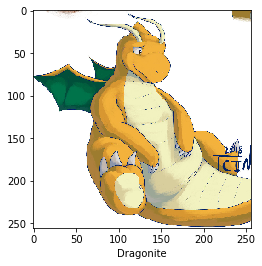

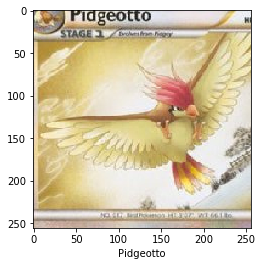

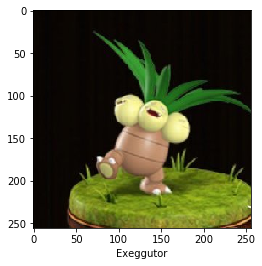

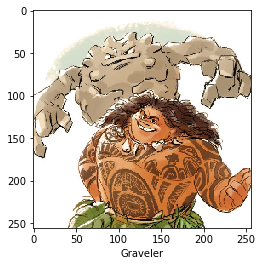

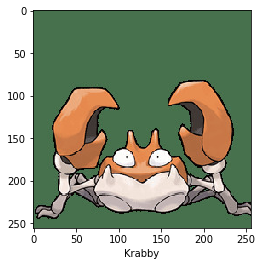

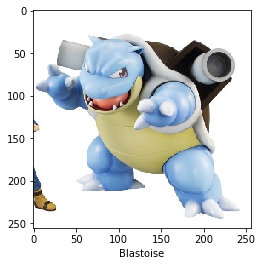

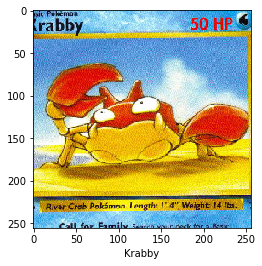

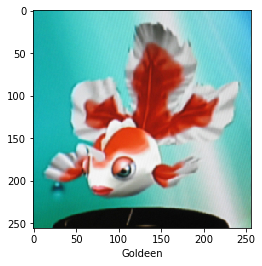

In [4]:
train_x,train_y = next(train_data)
for x,y in zip(train_x, train_y):
  plt.xlabel(classes[y.argmax()])
  plt.imshow(x)
  
  plt.show()

In [5]:
IMAGE_SIZE = [256, 256]

vgg = keras.applications.vgg16.VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False

x = keras.layers.Flatten()(vgg.output)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(1024, activation = 'relu')(x)
x = keras.layers.Dense(512, activation = 'relu')(x)
x = keras.layers.Dense(len(classes), activation = 'softmax')(x) 

model = keras.models.Model(inputs = vgg.input, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [6]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit(train_data,epochs=20, steps_per_epoch=275, validation_data=test_data, validation_steps = 65)

Epoch 1/20
275/275 [==============================] - 62s 225ms/step - loss: 5.2145 - accuracy: 0.0273 - val_loss: 4.5512 - val_accuracy: 0.0904
Epoch 2/20
275/275 [==============================] - 65s 236ms/step - loss: 3.8588 - accuracy: 0.1477 - val_loss: 3.0689 - val_accuracy: 0.2692
Epoch 3/20
275/275 [==============================] - 66s 240ms/step - loss: 2.6609 - accuracy: 0.3552 - val_loss: 2.6329 - val_accuracy: 0.3772
Epoch 4/20
275/275 [==============================] - 62s 224ms/step - loss: 1.9066 - accuracy: 0.5123 - val_loss: 2.2719 - val_accuracy: 0.5019
Epoch 5/20
275/275 [==============================] - 63s 228ms/step - loss: 1.6866 - accuracy: 0.5550 - val_loss: 1.6564 - val_accuracy: 0.5880
Epoch 6/20
275/275 [==============================] - 62s 226ms/step - loss: 0.7811 - accuracy: 0.7754 - val_loss: 1.9212 - val_accuracy: 0.5731
Epoch 7/20
275/275 [==============================] - 62s 226ms/step - loss: 0.7915 - accuracy: 0.7782 - val_loss: 1.6510 - val_ac

In [7]:
print ('Training Accuracy = ' + str(hist.history['accuracy']))
print ('Validation Accuracy = ' + str(hist.history['val_accuracy']))

Training Accuracy = [0.027272727340459824, 0.14772726595401764, 0.3551614284515381, 0.5122727155685425, 0.5550000071525574, 0.775352418422699, 0.778181791305542, 0.8076398372650146, 0.9045454263687134, 0.8440909385681152, 0.896771252155304, 0.8999999761581421, 0.9172351360321045, 0.9381818175315857, 0.8981817960739136, 0.9231469035148621, 0.9168182015419006, 0.9031378030776978, 0.9281818270683289, 0.9159091114997864]
Validation Accuracy = [0.09038461744785309, 0.26923078298568726, 0.3771760165691376, 0.5019230842590332, 0.5880077481269836, 0.5730769038200378, 0.607692301273346, 0.6653771996498108, 0.5980769395828247, 0.5473887920379639, 0.6307692527770996, 0.6134615540504456, 0.646034836769104, 0.6192307472229004, 0.5899419784545898, 0.6442307829856873, 0.5865384340286255, 0.6479690670967102, 0.5826923251152039, 0.6170212626457214]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


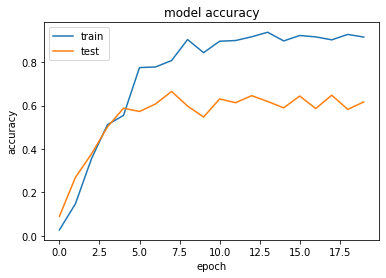

In [8]:
history_dict = hist.history
print(history_dict.keys())
# summarize history for accuracy
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

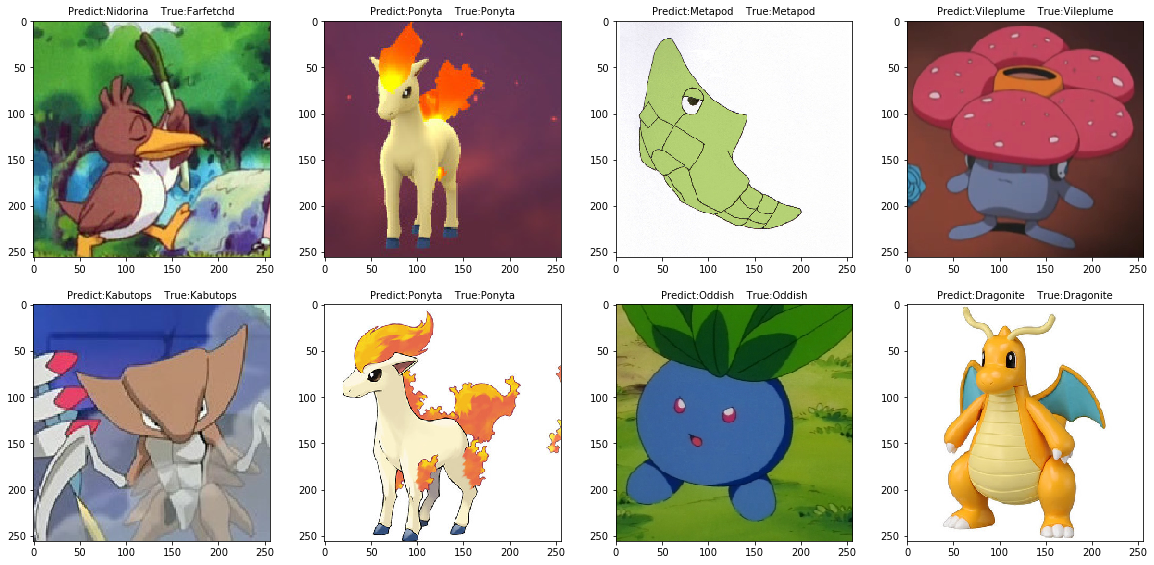

In [16]:
# ref: https://www.kaggle.com/dynmiwang/cnn-classification-by-tensorflow2

plt.figure(figsize=(20,20))
test_x,test_y = next(test_data) 
pred_y = model.predict(test_x)
for i in range(len(test_x)):
#     pred,y = pred_[i].argmax(), test_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(test_x[i])
    title_ = 'Predict:' + str(classes[pred_y[i].argmax()])+ '    True:' + str(classes[test_y[i].argmax()])
    plt.title(title_,size=10)
plt.show()